In [2]:
# Import relevant functionality
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

In [3]:
# Create the agent
memory = MemorySaver()

In [4]:
llm = ChatOpenAI(model_name="gpt-4o-mini")


llm.invoke("What is an agent based on large language models?")

AIMessage(content='An agent based on large language models (LLMs) refers to a computational entity or system that utilizes the capabilities of LLMs to perform tasks, make decisions, or interact with users in a context-aware manner. These agents leverage the natural language understanding and generation capabilities of LLMs to process input, generate responses, and carry out specific functions or goals. \n\nHere are some key characteristics and functionalities of such agents:\n\n1. **Natural Language Processing**: They can understand and generate human-like text, allowing them to engage in conversations, provide information, and answer questions.\n\n2. **Context Awareness**: LLM-based agents can maintain context over interactions, enabling them to provide coherent responses and follow conversations over multiple turns.\n\n3. **Task Execution**: These agents can perform specific tasks, such as scheduling appointments, providing recommendations, summarizing information, or executing comma

In [5]:
search = TavilySearchResults(max_results=3)

In [6]:
tools = [search]

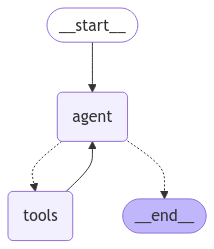

In [10]:
agent_executor

In [7]:
agent_executor = create_react_agent(llm, tools, checkpointer=memory)

In [8]:
# Use the agent
config = {"configurable": {"thread_id": "abc123"}}
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="hi im bob! and i live in sf")]}, config
):
    print(chunk)
    print("----")

for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the weather where I live?")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content="Hi Bob! It's great to meet you. How's life in San Francisco?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 88, 'total_tokens': 105, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bba3c8e70b', 'finish_reason': 'stop', 'logprobs': None}, id='run-af9de20a-f905-4972-bfc5-5ec5b707ff4b-0', usage_metadata={'input_tokens': 88, 'output_tokens': 17, 'total_tokens': 105, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
----
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_UFdwE6U5TjsJpVKI40kHzmHu', 'function': {'arguments': '{"query":"San Francisco weather"}',